<a href="https://colab.research.google.com/github/J-Chaudhary/comSimRepo/blob/main/assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - 8 (CISC-614-51-A2019)#
Student : Jignesh Chaudhary (id: 197320)
---------------------
## Inventory Model: Water and consumer demand ##
---------------------
A history of daily water usage (demand).

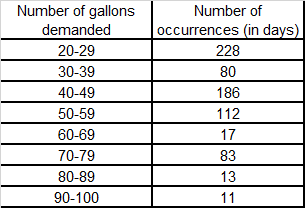
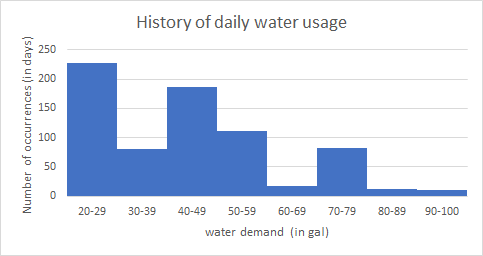

As an assignment requirement, This report devided in three defferent components,

### Component-1 The basic simulation model

Two very simple test cases manually computed in microsoft excel using constant demand rate and easy parameters for small simulation cycle 

Run a full simulation model with same variables   

produced results using model to verify it's output with manual computation. 

### Component-2 Generation of historical daily demand rates

compute inverse spline function (CDF, find invm and invb)

Generation of historical demand rates

### Component-3 Integration

After testing above two components i have applied parameters in given assignment

Q = 800      # Delivery quantity (gallons)

T = 15       # Time between deliveries (days)

N = 365      # Length of simulation (days)

d = 92.00    # Delivery cost (dollars per delivery)

s = 0.001    # Storage cost (dollars per gallon per day)

I have run 1000 simulation where each simulaton model compute average daily cost and zero inventory days.

Using this model I have produced a histogram that illustrates the variability

## Component-1 The basic simulation model
## Manual computation
followings are manual computation for 

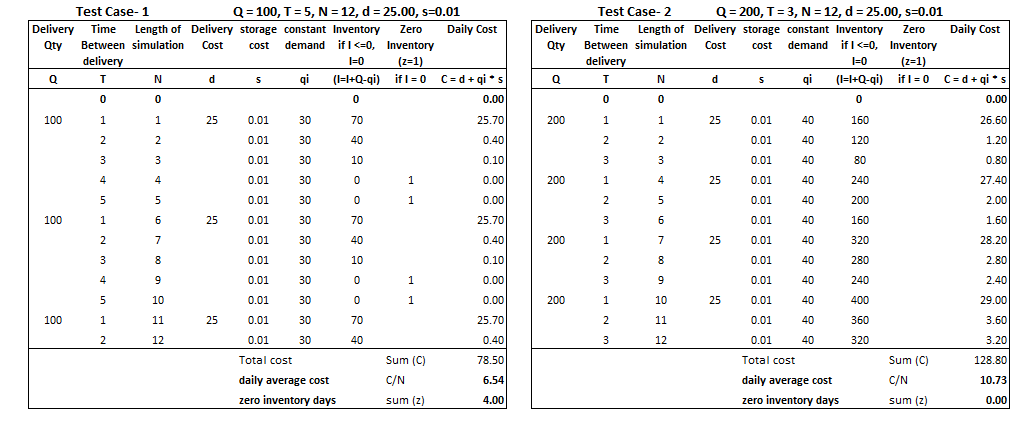


### The basic simulation model

Test case-1, Average daily cost = 6.54, zero inventory days = 4
Test case-2, Average daily cost = 10.73, zero inventory days = 0


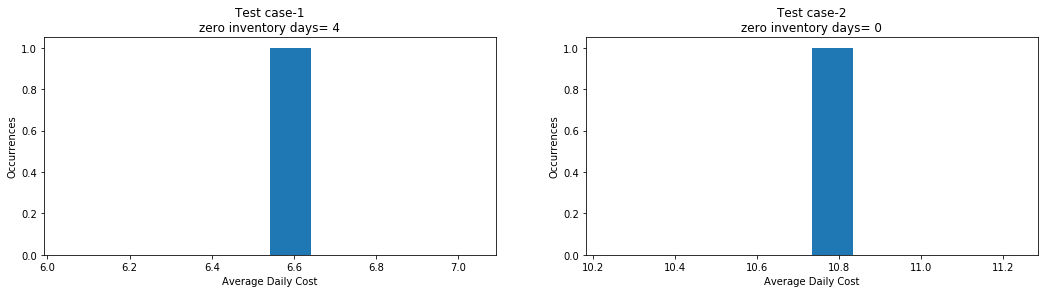

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def InventoryModel(Q, T, d, s, N, demand):
    K = N
    I = 0
    C = 0
    zeroinventoryday = 0
    Flag = 0
  
    while Flag == 0:      
        I += Q
        C += d
        if T >= K:
            T = K
            Flag = 1
        for i in range(T):
            qi = demand
            I -= qi
            if I <= 0:
                I = 0
                zeroinventoryday += 1
                K -= 1
            else:
                C += I * s
                K -= 1
    return C/N, zeroinventoryday

t1, z1 = InventoryModel(Q=100, T=5, d=25.0, s=0.01, N=12, demand=30)# constant demand 30 gal
t2, z2 = InventoryModel(Q=200, T=3, d=25.0, s=0.01, N=12, demand=40)# constant demand 40 gal
print(f"Test case-1, Average daily cost = {t1:2.2f}, zero inventory days = {z1}")
print(f"Test case-2, Average daily cost = {t2:2.2f}, zero inventory days = {z2}")

plt.subplot(1,2,1)
plt.hist(t1)
plt.xlabel("Average Daily Cost")
plt.ylabel("Occurrences")
plt.title(f'Test case-1\nzero inventory days= {z1}')
plt.subplot(1,2,2)
plt.hist(t2)
plt.xlabel("Average Daily Cost")
plt.ylabel("Occurrences")
plt.title(f'Test case-2\nzero inventory days= {z2}')
plt.subplots_adjust(left=.2, right=2.5, hspace=0.5)
plt.show()

We can compare results from manual computation and result form model are same.

## Component-2 Generation of historical daily demand rates
### Generation of historical daily demand rates

Daily demand rates prodeced using below function

In [ ]:
# a function to calculate demandrate in (0,1) interval
days_occu = [0, 228, 80, 186, 112, 17, 83, 13, 11]
b=np.array([days_occu[i]*1/sum(days_occu) for i in range(len(days_occu))])
print ("Number\nof occu     [%]     demandrate in [0,1] interval      ")
for i in range(len(days_occu)-1):
  print(f"{days_occu[i+1]:>4.0f}       {b[i+1]:3.3f}  |  {np.sum(b[:i+1]):3.3f} <= qi < {np.sum(b[:i+2]):3.3f}")

Number
of occu     [%]     demandrate in (0,1) interval      
 228       0.312  |  0.000 <= qi < 0.312
  80       0.110  |  0.312 <= qi < 0.422
 186       0.255  |  0.422 <= qi < 0.677
 112       0.153  |  0.677 <= qi < 0.830
  17       0.023  |  0.830 <= qi < 0.853
  83       0.114  |  0.853 <= qi < 0.967
  13       0.018  |  0.967 <= qi < 0.985
  11       0.015  |  0.985 <= qi < 1.000


## Cumulative Distribution Function Code

intvl    m          b     intvl     minv       binv           Demand interval          Linear spline
1      0.034      -0.69  |  1      29.03       20.0  |     0.00 <= p < 0.31,      x = 29.032 p + (20.0)
2      0.011      -0.01  |  2      90.91        0.8  |     0.31 <= p < 0.42,      x = 90.909 p + (0.8)
3      0.026      -0.59  |  3      38.46       22.8  |     0.42 <= p < 0.68,      x = 38.462 p + (22.8)
4      0.015      -0.05  |  4      66.67        3.7  |     0.68 <= p < 0.83,      x = 66.667 p + (3.7)
5      0.002       0.71  |  5     500.00     -356.0  |     0.83 <= p < 0.85,      x = 500.000 p + (-356.0)
6      0.012       0.02  |  6      83.33       -1.8  |     0.85 <= p < 0.97,      x = 83.333 p + (-1.8)
7      0.002       0.81  |  7     500.00     -406.0  |     0.97 <= p < 0.99,      x = 500.000 p + (-406.0)
8      0.001       0.91  |  8    1100.00    -1000.0  |     0.99 <= p < 1.00,      x = 1100.000 p + (-1000.0)


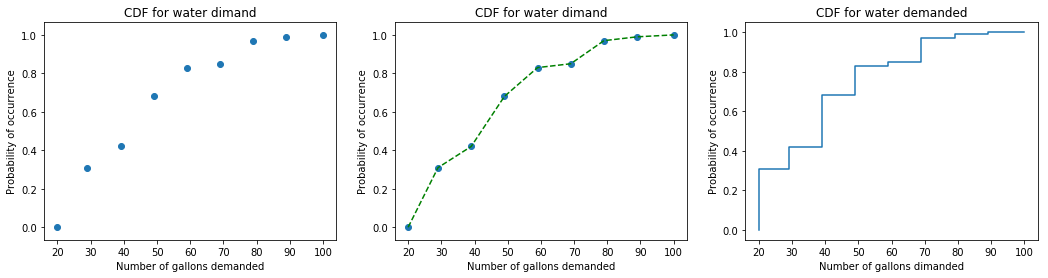

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
water_demand = np.array([20, 29, 39, 49, 59, 69, 79, 89, 100])
q = np.array([0, 0.31, 0.42, 0.68, 0.83, 0.85, 0.97, 0.99, 1.00])

# find m and b to the piecewise linear interpolation q=mx + b
m = np.zeros((water_demand.size-1))
b = np.zeros((water_demand.size-1))
print ('intvl    m          b     intvl     minv       binv           Demand interval          Linear spline')

for i in np.arange(water_demand.size-1):
   m[i] = (q[i+1] - q[i]) / (water_demand[i+1] - water_demand[i])
   b[i] = q[i] - m[i] * water_demand[i]

# invers function will be x = minv*q + binv
minv = np.zeros((water_demand.size-1))
binv = np.zeros((water_demand.size-1))
for i in np.arange(water_demand.size-1):
   minv[i] = 1.0/m[i]
   binv[i] = -b[i]/m[i]
   print(f"{i+1:<1d}{m[i]:^17.3f}{b[i]:>5.2f}  |  {i+1} {minv[i]:>10.2f}   {binv[i]:>8.1f}  | \
    {q[i]:>2.2f} <= p < {q[i+1]:>2.2f},      x = {minv[i]:3.3f} p + ({binv[i]:3.1f})")

plt.subplot(1,3,1)
plt.scatter(water_demand, q)
plt.xlabel('Number of gallons demanded')
plt.ylabel('Probability of occurrence')
plt.title("CDF for water dimand")

plt.subplot(1,3,2)
plt.scatter(water_demand, q)
plt.plot(water_demand, q, 'g--')
plt.xlabel('Number of gallons demanded')
plt.ylabel('Probability of occurrence')
plt.title("CDF for water dimand")

plt.subplot(1, 3, 3)
plt.step(water_demand, q)
plt.title('CDF for water demanded')
plt.xlabel('Number of gallons dimanded')
plt.ylabel('Probability of occurrence')
plt.subplots_adjust(left=.2, right=2.5, hspace=0.5)
plt.show()

# A function to compute demand derive form history

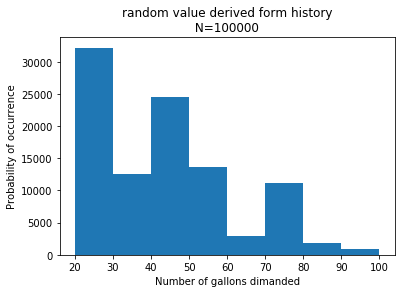

In [ ]:
def demand_from_history(x, q): # demand rate derive form history   
    m = np.zeros((x.size-1))
    b = np.zeros((x.size-1))
    for i in np.arange((x.size-1)):
        m[i] = (q[i+1] - q[i]) / (x[i+1] - x[i])
        b[i] = q[i] - m[i] * x[i]
    minv = np.zeros((x.size-1))
    binv = np.zeros((x.size-1))
    for i in np.arange(x.size-1):
        minv[i] = 1.0/m[i]
        binv[i] = -b[i]/m[i]
    p = np.random.uniform()
    #select the appropriate piecewise interval
    if 0.00 <= p < 0.31: intvl = 1
    elif 0.31 <= p < 0.42:  intvl = 2
    elif 0.42 <= p < 0.68:  intvl = 3
    elif 0.68 <= p < 0.83:  intvl = 4
    elif 0.83 <= p < 0.85:  intvl = 5
    elif 0.85 <= p < 0.97:  intvl = 6
    elif 0.97 <= p < 0.99:  intvl = 7
    else :  intvl = 8
    # use inverse function for the select inverval
    qi = minv[intvl-1] * p + binv[intvl-1]
    return qi

x = np.array([20, 29, 39, 49, 59, 69, 79, 89, 100])
q = np.array([0, 0.31, 0.42, 0.68, 0.83, 0.85, 0.97, 0.99, 1.00])
n = 100000
qi = np.zeros((n))
for i in range(n):
    qi[i] = demand_from_history(x,q)
plt.hist(qi, bins=8)
plt.title('random value derived form history\n N=100000 ') 
plt.xlabel('Number of gallons dimanded')
plt.ylabel('Probability of occurrence')
plt.show()

To verify above function We can compare above histogram with histogram of original data

# Integration

In [ ]:
def InventoryModel(Q, T, d, s, N):
    K = N
    I = 0
    C = 0
    zeroinventoryday = 0
    Flag = 0
  
    while Flag == 0:      
        I += Q
        C += d
        if T >= K:
            T = K
            Flag = 1
        for i in range(T):
            qi = demand_from_history(x, q)
            I -= qi
            if I <= 0:
                I = 0
                zeroinventoryday += 1
                K -= 1
            else:
                C += I * s
                K -= 1
    return C/N, int(zeroinventoryday)

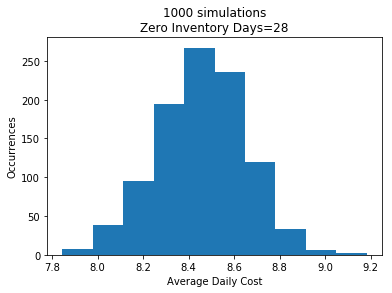

In [ ]:
n=1000
c = np.zeros(n)
z = np.zeros(n)
for j in range(n):
    c[j], z[j] = InventoryModel(Q=800, T=15, d=92.0, s=0.001, N=365)
plt.hist(c)
plt.title(f"1000 simulations\nZero Inventory Days={np.sum(z,dtype=int)}")
plt.xlabel("Average Daily Cost")
plt.ylabel("Occurrences")
plt.show()
